In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

IMPORTING THE DATASET

In [53]:
data=pd.read_csv("C:/Users/DELL/Downloads/archive/Mobile Price Prediction Datatset.csv")

In [54]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [58]:
print(data["Price"].value_counts())

Price
649       32
799       19
1199      19
1099      17
1299      15
          ..
7199       1
950        1
253000     1
9987       1
21499      1
Name: count, Length: 253, dtype: int64


In [6]:
data.head()#Gives the first 5 data points to explore

,Unnamed: 0,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,0,"LG V30+ (Black, 128 )",4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,1,I Kall K11,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,2,Nokia 105 ss,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,3,"Samsung Galaxy A50 (White, 64 )",4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4,"POCO F1 (Steel Blue, 128 )",4.5,6.0,128.0,6.18,35,15.0,3800,18999


KNOWING THE COLUMN NAMES

In [7]:
data.columns#Prints the column names

Index(['Unnamed: 0', 'Brand me', 'Ratings', 'RAM', 'ROM', 'Mobile_Size',
       'Primary_Cam', 'Selfi_Cam', 'Battery_Power', 'Price'],
      dtype='object')

In [8]:
data.info()#It gives the datatype of each datapoint

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     836 non-null    int64  
 1   Brand me       836 non-null    object 
 2   Ratings        805 non-null    float64
 3   RAM            829 non-null    float64
 4   ROM            832 non-null    float64
 5   Mobile_Size    834 non-null    float64
 6   Primary_Cam    836 non-null    int64  
 7   Selfi_Cam      567 non-null    float64
 8   Battery_Power  836 non-null    int64  
 9   Price          836 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 65.4+ KB


In [9]:
data.shape#Prints the number of rows and columns

(836, 10)

In [10]:
data.describe()#it gives the central tendencies of the data

,Unnamed: 0,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
count,836.000000,805.000000,829.000000,832.000000,834.000000,836.000000,567.000000,836.000000,836.00000
mean,417.500000,4.103106,6.066345,64.373077,5.597282,47.983254,9.784832,3274.688995,18220.34689
std,241.476707,0.365356,2.530336,53.447825,3.898664,11.170093,6.503838,927.518852,52805.55022
min,0.000000,2.800000,0.000000,0.000000,2.000000,5.000000,0.000000,1020.000000,479.00000
25%,208.750000,3.800000,6.000000,32.000000,4.500000,48.000000,5.000000,3000.000000,984.75000
50%,417.500000,4.100000,6.000000,40.000000,4.770000,48.000000,8.000000,3000.000000,1697.00000
75%,626.250000,4.400000,6.000000,64.000000,6.300000,48.000000,13.000000,3800.000000,18999.00000
max,835.000000,4.800000,34.000000,256.000000,44.000000,64.000000,61.000000,6000.000000,573000.00000


In [11]:
data['Price'].unique()#returns the unique price values

array([ 24999,  15999,  15000,  18999, 140300,  29999,  47999,  16490,
        22999,   1099,   1299,   5498,   3999,  43999,  42990,    990,
        77999,  12990,   1199,   1699,   1349,   1240,    649,   1690,
          927,   1599,    999,  54990,  21499,   1799, 573000,   1549,
          847,   1579,   1330,    945,  15899,  31590,   1451,   7490,
          798,    869,   3580,   1695,   2599, 117100,  53990,  31999,
         1390,    898,    799, 121300,   9790,    930,  13999,   1149,
        56999,  68300,   8798,   8990,   3149,  42998,  18990, 106600,
       103000,  18989,  17990,   1500,   1570,  38990,   1399,    785,
         2100,   9999,   1049,   1100,   1790,   1125,   1625,    559,
          749,   9490,  14990,   1499,  36990,  21999,    940,    899,
         1250,   2450,   2299,    685,   1190,   1369,    960,    639,
        13744,  13950,    479,   2025, 153000,    650,  13298,  17999,
        16499,  18099,    699,   6999,    539,  13699,    813,    890,
      

In [12]:
pd.isnull(data).sum()#To find the number of datapoints with null points

Unnamed: 0         0
Brand me           0
Ratings           31
RAM                7
ROM                4
Mobile_Size        2
Primary_Cam        0
Selfi_Cam        269
Battery_Power      0
Price              0
dtype: int64

In [13]:
x=data['Price']#Stores all the prices of the mobile
y=data.drop('Price',axis=1)

In [14]:
x.unique()

array([ 24999,  15999,  15000,  18999, 140300,  29999,  47999,  16490,
        22999,   1099,   1299,   5498,   3999,  43999,  42990,    990,
        77999,  12990,   1199,   1699,   1349,   1240,    649,   1690,
          927,   1599,    999,  54990,  21499,   1799, 573000,   1549,
          847,   1579,   1330,    945,  15899,  31590,   1451,   7490,
          798,    869,   3580,   1695,   2599, 117100,  53990,  31999,
         1390,    898,    799, 121300,   9790,    930,  13999,   1149,
        56999,  68300,   8798,   8990,   3149,  42998,  18990, 106600,
       103000,  18989,  17990,   1500,   1570,  38990,   1399,    785,
         2100,   9999,   1049,   1100,   1790,   1125,   1625,    559,
          749,   9490,  14990,   1499,  36990,  21999,    940,    899,
         1250,   2450,   2299,    685,   1190,   1369,    960,    639,
        13744,  13950,    479,   2025, 153000,    650,  13298,  17999,
        16499,  18099,    699,   6999,    539,  13699,    813,    890,
      

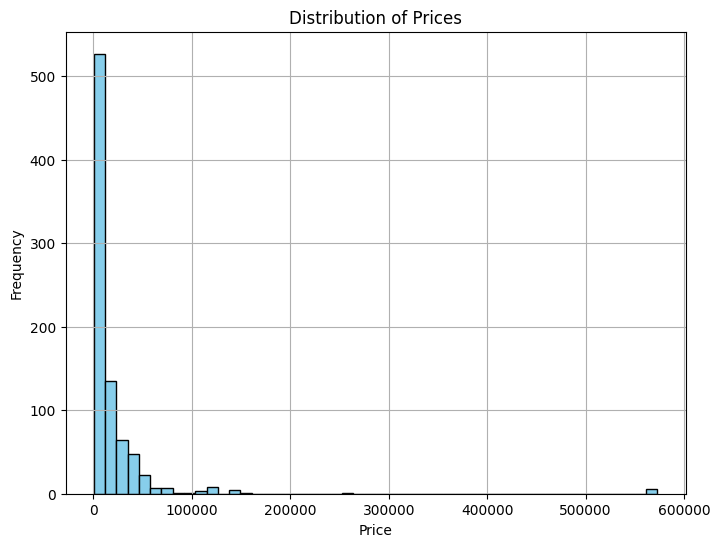

In [63]:
# Determine the number of bins
num_bins = 50

# Plot the histogram with increased bins
plt.figure(figsize=(8, 6))
plt.hist(data['Price'], bins=num_bins, color='skyblue', edgecolor='black')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


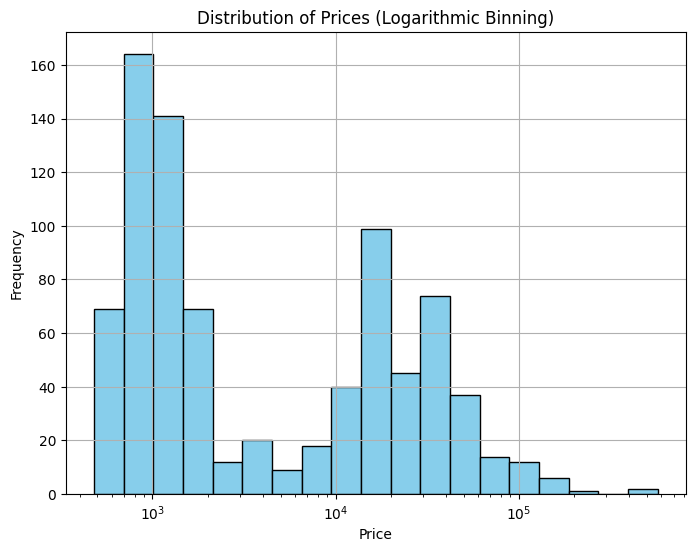

In [64]:
# Define the range for logarithmic binning
min_price = data['Price'].min()
max_price = data['Price'].max()

# Create logarithmically spaced bins
log_bins = np.logspace(np.log10(min_price), np.log10(max_price), num=20)

# Plot the histogram with logarithmic binning
plt.figure(figsize=(8, 6))
plt.hist(data['Price'], bins=log_bins, color='skyblue', edgecolor='black')
plt.title('Distribution of Prices (Logarithmic Binning)')
plt.xscale('log')  # Set x-axis scale to logarithmic
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
